<a href="https://colab.research.google.com/github/AbhimanyuAryan/DeepLearning_MNIST/blob/master/sgd_full_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
path = Path('data/mnist')

In [74]:
!wget "http://deeplearning.net/data/mnist/mnist.pkl.gz"

--2019-04-13 21:24:23--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  15.8MB/s    in 1.0s    

2019-04-13 21:24:24 (15.8 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [75]:
!mkdir /content/data/mnist

mkdir: cannot create directory ‘/content/data/mnist’: File exists


In [0]:
!mv mnist.pkl.gz data/mnist/

In [77]:
path.ls()

[PosixPath('data/mnist/mnist.pkl.gz')]

In [0]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)

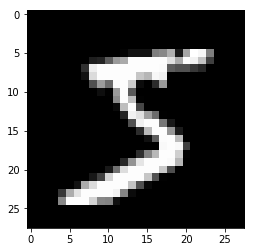

In [79]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

In [80]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In [0]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [82]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [0]:
class Mnist_Logistic(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin = nn.Linear(784, 10, bias=True)
    
  def forward(self, xb): return self.lin(xb)

In [0]:
model = Mnist_Logistic().cuda()

In [85]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [86]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [87]:
model(x).shape

torch.Size([64, 10])

In [88]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [0]:
lr = 2e-2

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
def update(x, y, lr):
  wd = 1e-5
  y_hat = model(x)
  # Weight decay
  w2 = 0.
  for p in model.parameters(): w2 += (p**2).sum()
  # add to regular loss
  loss = loss_func(y_hat, y) + w2*wd
  loss.backward()
  with torch.no_grad():
    for p in model.parameters():
      p.sub_(lr * p.grad)
      p.grad.zero_()
  return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

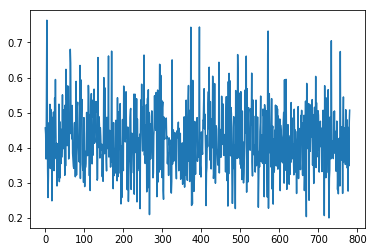

In [108]:
plt.plot(losses)

In [0]:
"""Now we have this update function we can replace this Mnist_Logistic 
with Mnist Neural Network"""
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [0]:
model = Mnist_NN().cuda()

In [0]:
lossses = [update(x,y, 2e-2) for x,y in data.train_dl]

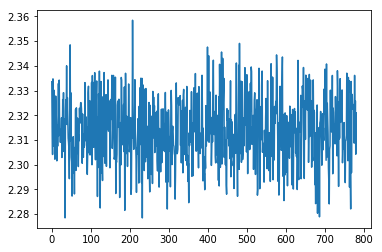

In [127]:
plt.plot(losses);

In [0]:
model3 = Mnist_NN().cuda()

In [0]:
def update1(x,y, lr):
  opt = optim.Adam(model.parameters(), lr) 
  # The above line is to minimize loss 
  #     for p in model.parameters():
  #                  p.sub_(lr * p.grad)
  y_hat = model3(x)
  loss = loss_func(y_hat, y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()  # converts into python list for fast representation

In [0]:
losses = [update1(x, y, 1e-3) for x, y in data.train_dl]

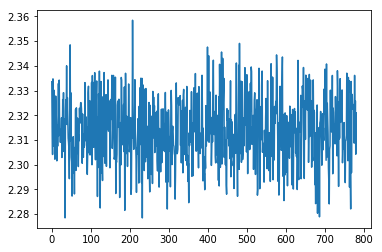

In [120]:
plt.plot(losses)